<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [1]:
# Code:
def mean_values(numbers):
    count=int(len(numbers))
    sum_numbers=sum(numbers)
    mean_numbers=sum_numbers/count
    return mean_numbers

In [2]:
mean_values([13, 18, 13, 14, 13, 16, 14, 21, 13])

15.0

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [3]:
# Code:
def std_deviation(list_numbers):
    mean=mean_values(list_numbers)
    n=len(list_numbers)
    step2_list=[]
    for i in list_numbers:
        step_1=(i-mean)**2
        step2_list.append(step_1)
    step_3=sum(step2_list)/(n-1)
    final_stdeviation=(step_3)**(1/2)
    return final_stdeviation

In [4]:
std_deviation([3,4,5])

1.0

3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [5]:
# Code:
def percentage_to_float(num_percentage):
    replace_string=num_percentage.replace("%","").replace("—","0")
    final_result=float(replace_string)/100
    return  final_result

In [6]:
percentage_to_float("50%")

0.5

In [7]:
percentage_to_float("30.5%")

0.305

In [8]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Import and Cleaning

### Read in SAT 2019 and ACT 2019 Data

### Display first five rows of the two datasets

In [9]:
sat_2019 = pd.read_csv("../data/sat_2019.csv")
sat_2019.head()

,State,Participation Rate,EBRW,Math,Total
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065


In [10]:
act_2019 = pd.read_csv("../data/act_2019.csv")
act_2019.head()

,State,Participation,Composite
0,Alabama,100%,18.9
1,Alaska,38%,20.1
2,Arizona,73%,19.0
3,Arkansas,100%,19.3
4,California,23%,22.6


### Number of rows and columns in SAT 2019 and ACT 2019

In [11]:
sat_2019.shape

(53, 5)

In [12]:
act_2019.shape

(52, 3)

### Datatypes of SAT 2019 and ACT 2019

In [13]:
sat_2019.dtypes

State                 object
Participation Rate    object
EBRW                   int64
Math                   int64
Total                  int64
dtype: object

In [14]:
act_2019.dtypes

State             object
Participation     object
Composite        float64
dtype: object

### Check  for missing values in SAT and ACT 2019

In [15]:
sat_2019.isnull().sum()

State                 0
Participation Rate    0
EBRW                  0
Math                  0
Total                 0
dtype: int64

In [16]:
act_2019.isnull().sum()

State            0
Participation    0
Composite        0
dtype: int64

In [17]:
#Getting value counts and sorting the index
sat_2019[['Participation Rate']].value_counts().sort_index(ascending=False).head(5)

Participation Rate
—                     2
99%                   2
95%                   1
94%                   1
9%                    1
dtype: int64

In [18]:
print(sorted(list(sat_2019["Participation Rate"].unique()), reverse=True)) 
#Turning the unique values into a list and then  sorting and reversing it

['—', '99%', '95%', '94%', '9%', '82%', '81%', '79%', '71%', '70%', '7%', '68%', '66%', '63%', '6%', '54%', '51%', '5%', '41%', '4%', '31%', '3%', '22%', '20%', '2%', '19%', '18%', '100%']


In [19]:
#Getting value counts and sorting the index
act_2019[['Participation']].value_counts().sort_index(ascending=False).head(5)

Participation
96%              1
95%              1
82%              1
80%              1
78%              1
dtype: int64

### Fix Errors,Incorrect data types and then check data types  to confirm that they are correct for SAT and ACT 2019

converting "Participation" column data type by calling percentage_to_float and mapping it to the column.
To make the changes stick, reassigning the result to the column

In [20]:
act_2019['Participation']=act_2019['Participation'].map(percentage_to_float)

In [21]:
act_2019.dtypes

State             object
Participation    float64
Composite        float64
dtype: object

In [22]:
sat_2019['Participation Rate']=sat_2019['Participation Rate'].map(percentage_to_float)

checking data types of dataset after converting 'Participation Rate' column data type

In [23]:
sat_2019.dtypes

State                  object
Participation Rate    float64
EBRW                    int64
Math                    int64
Total                   int64
dtype: object

To get summary statistics for each of the columns.

### Check for any issue with observations 

In [24]:
act_2019.describe()

,Participation,Composite
count,52.000000,52.000000
mean,0.585385,21.450000
std,0.341883,2.175487
min,0.060000,17.900000
25%,0.247500,19.800000
50%,0.530000,20.950000
75%,1.000000,23.650000
max,1.000000,25.500000


To get summary statistics for each of the columns.

In [25]:
sat_2019.describe()

,Participation Rate,EBRW,Math,Total
count,53.000000,53.000000,53.000000,53.000000
mean,0.472075,558.000000,548.471698,1106.528302
std,0.391498,47.554422,53.785044,100.994784
min,0.000000,483.000000,445.000000,935.000000
25%,0.040000,518.000000,506.000000,1024.000000
50%,0.510000,550.000000,545.000000,1097.000000
75%,0.820000,610.000000,596.000000,1200.000000
max,1.000000,636.000000,648.000000,1284.000000


### Create a new column in both data sets 
"sat_score_percentage" which is equal to (Total of each state/"SAT" total score *100) \
"act_score_percentage" which is equal to (Composite Score of each state/"ACT" total score *100)

As participation rate is in float ,for my understanding purpose creating new column

In [26]:
sat_2019['sat_score_percentage']=sat_2019['Total']/1600*100
sat_2019.head()

,State,Participation Rate,EBRW,Math,Total,sat_score_percentage
0,Alabama,0.07,583,560,1143,71.4375
1,Alaska,0.41,556,541,1097,68.5625
2,Arizona,0.31,569,565,1134,70.8750
3,Arkansas,0.06,582,559,1141,71.3125
4,California,0.63,534,531,1065,66.5625


In [27]:
act_2019['act_score_percentage']=act_2019['Composite']/36*100
act_2019.head()

,State,Participation,Composite,act_score_percentage
0,Alabama,1.00,18.9,52.500000
1,Alaska,0.38,20.1,55.833333
2,Arizona,0.73,19.0,52.777778
3,Arkansas,1.00,19.3,53.611111
4,California,0.23,22.6,62.777778


### Rename Columns  of SAT and ACT 2019

In [28]:
sat_2019.rename(columns={"State":"state_name",
            "Participation Rate":"sat_participation_percentage",
             "EBRW":"ebrw_score",
              "Math":"math_score",
               "Total":"sat_total_score",
                "sat_score_percentage":"sat_score_percentage"},
           inplace=True)

In [29]:
sat_2019.head()

,state_name,sat_participation_percentage,ebrw_score,math_score,sat_total_score,sat_score_percentage
0,Alabama,0.07,583,560,1143,71.4375
1,Alaska,0.41,556,541,1097,68.5625
2,Arizona,0.31,569,565,1134,70.8750
3,Arkansas,0.06,582,559,1141,71.3125
4,California,0.63,534,531,1065,66.5625


In [30]:
act_2019.rename(columns={"State":"state_name",
            "Participation":"act_participation_percentage",
            "Composite":"act_composite_score",
             "act_score_percentage":"act_score_percentage"},
           inplace=True)

In [31]:
act_2019.head()

,state_name,act_participation_percentage,act_composite_score,act_score_percentage
0,Alabama,1.00,18.9,52.500000
1,Alaska,0.38,20.1,55.833333
2,Arizona,0.73,19.0,52.777778
3,Arkansas,1.00,19.3,53.611111
4,California,0.23,22.6,62.777778


### Drop the unwanted rows and reset the index and then check number of rows and columns to confirm for SAT and ACT 2019

In [32]:
act_2019.drop(act_2019.index[51],inplace=True)

In [33]:
act_2019.reset_index(drop=True,inplace=True)

In [34]:
act_2019

,state_name,act_participation_percentage,act_composite_score,act_score_percentage
0,Alabama,1.00,18.9,52.500000
1,Alaska,0.38,20.1,55.833333
2,Arizona,0.73,19.0,52.777778
3,Arkansas,1.00,19.3,53.611111
4,California,0.23,22.6,62.777778
5,Colorado,0.27,23.8,66.111111
6,Connecticut,0.22,25.5,70.833333
7,Delaware,0.13,24.1,66.944444
8,District of Columbia,0.32,23.5,65.277778
9,Florida,0.54,20.1,55.833333


In [35]:
sat_2019.drop(sat_2019.index[47],inplace=True)

In [36]:
sat_2019.reset_index(drop=True,inplace=True)

In [37]:
sat_2019

,state_name,sat_participation_percentage,ebrw_score,math_score,sat_total_score,sat_score_percentage
0,Alabama,0.07,583,560,1143,71.4375
1,Alaska,0.41,556,541,1097,68.5625
2,Arizona,0.31,569,565,1134,70.8750
3,Arkansas,0.06,582,559,1141,71.3125
4,California,0.63,534,531,1065,66.5625
5,Colorado,1.00,518,506,1024,64.0000
6,Connecticut,1.00,529,516,1046,65.3750
7,Delaware,1.00,499,486,985,61.5625
8,District of Columbia,0.94,495,480,975,60.9375
9,Florida,1.00,516,483,999,62.4375


In [38]:
sat_2019.drop(sat_2019.index[39],inplace=True)

In [39]:
sat_2019.reset_index(drop=True,inplace=True)

In [40]:
sat_2019

,state_name,sat_participation_percentage,ebrw_score,math_score,sat_total_score,sat_score_percentage
0,Alabama,0.07,583,560,1143,71.4375
1,Alaska,0.41,556,541,1097,68.5625
2,Arizona,0.31,569,565,1134,70.8750
3,Arkansas,0.06,582,559,1141,71.3125
4,California,0.63,534,531,1065,66.5625
5,Colorado,1.00,518,506,1024,64.0000
6,Connecticut,1.00,529,516,1046,65.3750
7,Delaware,1.00,499,486,985,61.5625
8,District of Columbia,0.94,495,480,975,60.9375
9,Florida,1.00,516,483,999,62.4375


In [41]:
sat_2019.shape

(51, 6)

In [42]:
act_2019.shape

(51, 4)

### Create a copy of  cleaned data files 

In [43]:
sat_2019.to_csv("../data/sat_2019_modified.csv", index=False)

In [44]:
act_2019.to_csv("../data/act_2019_modified.csv", index=False)

### Merge both datafiles and save datafile as final_sat_act_2019

In [45]:
final_sat_act_2019=pd.merge(act_2019,sat_2019,how='left')

In [46]:
final_sat_act_2019.head()

,state_name,act_participation_percentage,act_composite_score,act_score_percentage,sat_participation_percentage,ebrw_score,math_score,sat_total_score,sat_score_percentage
0,Alabama,1.00,18.9,52.500000,0.07,583,560,1143,71.4375
1,Alaska,0.38,20.1,55.833333,0.41,556,541,1097,68.5625
2,Arizona,0.73,19.0,52.777778,0.31,569,565,1134,70.8750
3,Arkansas,1.00,19.3,53.611111,0.06,582,559,1141,71.3125
4,California,0.23,22.6,62.777778,0.63,534,531,1065,66.5625


In [47]:
final_sat_act_2019.to_csv("../data/final_sat_act_2019.csv",index=False)

### Check datatypes of the new datafile 

In [48]:
final_sat_act_2019.dtypes

state_name                       object
act_participation_percentage    float64
act_composite_score             float64
act_score_percentage            float64
sat_participation_percentage    float64
ebrw_score                        int64
math_score                        int64
sat_total_score                   int64
sat_score_percentage            float64
dtype: object

### Data Dictionary

|            Feature           	|   Type  	| Dataset  	|                      Description                      	|
|:----------------------------:	|:-------:	|----------	|:-----------------------------------------------------:	|
|          state_name          	|  object 	|  SAT/ACT 	|                         State                         	|
| sat_participation_percentage 	|  float  	| sat_2019 	|         Statewide SAT Participation Rate, 2019        	|
|          ebrw_score          	| integer 	| sat_2019 	| State mean score, SAT Reading/Writing (200-800), 2019 	|
|          math_score          	| integer 	| sat_2019 	|       State mean score, SAT Math (200-800), 2019      	|
|        sat_total_score       	| integer 	| sat_2019 	|      State mean total SAT score (400-1600), 2019      	|
| act_participation_percentage 	|  float  	| act_2019 	|         Statewide ACT Participation Rate, 2019        	|
|      act_composite_score     	|  float  	| act_2019 	|      State mean ACT Composite Score (1-36), 2019      	|
|     sat_score_percentage     	|  float  	| act_2019 	|          Statewide SAT Score Percentage, 2019         	|
|     act_score_percentage     	|  float  	| act_2019 	|          Statewide ACT Score Percentage, 2019         	|

### Exploratory Data Analysis

### Summary Statistics

Transpose the output of pandas describe method to create a quick overview of each numeric feature

In [49]:
final_sat_act_2019.describe().T

,count,mean,std,min,25%,50%,75%,max
act_participation_percentage,51.0,0.586667,0.345159,0.060000,0.245,0.540000,1.000000,1.000000
act_composite_score,51.0,21.464706,2.194523,17.900000,19.800,21.100000,23.700000,25.500000
act_score_percentage,51.0,59.624183,6.095896,49.722222,55.000,58.611111,65.833333,70.833333
sat_participation_percentage,51.0,0.490588,0.387476,0.020000,0.055,0.540000,0.820000,1.000000
ebrw_score,51.0,560.803922,46.248035,483.000000,527.500,550.000000,612.000000,636.000000
math_score,51.0,552.196078,51.290553,460.000000,511.500,546.000000,599.000000,648.000000
sat_total_score,51.0,1113.078431,97.197910,943.000000,1038.000,1097.000000,1210.000000,1284.000000
sat_score_percentage,51.0,69.567402,6.074869,58.937500,64.875,68.562500,75.625000,80.250000


### Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [50]:
dataframe_2019 = final_sat_act_2019[final_sat_act_2019.columns[1:21]]
dataframe_2019
sd_2019={key:std_deviation(dataframe_2019[key]) for key in dataframe_2019.columns}
sd_2019

{'act_participation_percentage': 0.34515890060473114,
 'act_composite_score': 2.1945225931315235,
 'act_score_percentage': 6.095896092032011,
 'sat_participation_percentage': 0.38747599546142664,
 'ebrw_score': 46.24803546437109,
 'math_score': 51.29055258343124,
 'sat_total_score': 97.1979100880785,
 'sat_score_percentage': 6.074869380504906}

### Investigate trends in data using sorting and masking

### Lowest and Highest SAT and ACT participation rate

In [51]:
final_sat_act_2019.sort_values('sat_participation_percentage')[['state_name','sat_participation_percentage']].head()

,state_name,sat_participation_percentage
34,North Dakota,0.02
50,Wyoming,0.03
41,South Dakota,0.03
27,Nebraska,0.03
49,Wisconsin,0.03


In [52]:
final_sat_act_2019.sort_values('sat_participation_percentage',ascending=False)[['state_name','sat_participation_percentage']].head(8)

,state_name,sat_participation_percentage
39,Rhode Island,1.0
13,Illinois,1.0
22,Michigan,1.0
5,Colorado,1.0
6,Connecticut,1.0
7,Delaware,1.0
9,Florida,1.0
12,Idaho,1.0


North Dakota has the lowest participation rate(2%) in SAT \ 
while Rhode Island,Illinois,Michigan,Colorado,Connecticut,Delaware,Florida,Idaho has 100% participation rate in SAT.

In [53]:
final_sat_act_2019.sort_values('act_participation_percentage')[['state_name','act_participation_percentage']].head()

,state_name,act_participation_percentage
19,Maine,0.06
39,Rhode Island,0.12
7,Delaware,0.13
29,New Hampshire,0.14
38,Pennsylvania,0.17


In [54]:
final_sat_act_2019.sort_values('act_participation_percentage',ascending=False)[['state_name','act_participation_percentage']].head(15)

,state_name,act_participation_percentage
0,Alabama,1.0
17,Kentucky,1.0
49,Wisconsin,1.0
44,Utah,1.0
42,Tennessee,1.0
36,Oklahoma,1.0
35,Ohio,1.0
33,North Carolina,1.0
28,Nevada,1.0
27,Nebraska,1.0


ACT seems to have a higher minimum participation rate across the country \
Maine is the lowest in 2019, at 6%, aside from that the second lowest is Rhode Island at 12%. \
Whereas in SAT there are 14 states with participation rate under 5% \
There are 15 states with participation rate of 100% in ACT which shows that ACT is outpacing SAT

### Lowest and Highest SAT and ACT score

In [55]:
final_sat_act_2019.sort_values('sat_total_score')[['state_name','sat_total_score','sat_participation_percentage']].head()

,state_name,sat_total_score,sat_participation_percentage
48,West Virginia,943,0.99
36,Oklahoma,963,0.22
8,District of Columbia,975,0.94
7,Delaware,985,1.00
12,Idaho,993,1.00


In [56]:
final_sat_act_2019.sort_values('sat_total_score',ascending=False)[['state_name','sat_total_score','sat_participation_percentage']].head()

,state_name,sat_total_score,sat_participation_percentage
23,Minnesota,1284,0.04
49,Wisconsin,1283,0.03
41,South Dakota,1268,0.03
34,North Dakota,1263,0.02
27,Nebraska,1260,0.03


States with high participation rate Delaware,Idaho are among the states with lowest score \
States with low participation rate Wisconsin,North Dakota,South Dakota,Nebraska,Minnesota are the states with highest score \
Exception is Oklahoma which has low participation rate and score

In [57]:
final_sat_act_2019.sort_values('act_composite_score')[['state_name','act_composite_score','act_participation_percentage']].head()

,state_name,act_composite_score,act_participation_percentage
28,Nevada,17.9,1.00
24,Mississippi,18.4,1.00
40,South Carolina,18.8,0.78
18,Louisiana,18.8,1.00
0,Alabama,18.9,1.00


In [58]:
final_sat_act_2019.sort_values('act_composite_score',ascending=False)[['state_name','act_composite_score','act_participation_percentage']].head()

,state_name,act_composite_score,act_participation_percentage
21,Massachusetts,25.5,0.21
6,Connecticut,25.5,0.22
29,New Hampshire,25.0,0.14
39,Rhode Island,24.7,0.12
32,New York,24.5,0.22


States with high mean ACT composite scores tend to be those with lower participation rates, and vice versa \
For instance,Nevada with 100% participation rate tops as the state with lowest score

### states with more than 50% participation in both SAT and ACT

In [59]:
final_sat_act_2019[(final_sat_act_2019['act_participation_percentage'] > 0.5) 
              & (final_sat_act_2019['sat_participation_percentage'] > 0.5)][['state_name','sat_participation_percentage','act_participation_percentage']]

,state_name,sat_participation_percentage,act_participation_percentage
9,Florida,1.00,0.54
11,Hawaii,0.54,0.80
33,North Carolina,0.51,1.00
40,South Carolina,0.68,0.78


Of the four South Carolina,North Carolina,Hawaii are in top 10 states with low ACT Score \
whereas Florida,South Carolina are in top 15 least scored states and Hawaii,North Carolina were bit more than Mean Score

### states with more than 50% participation and achieved mean score of 1100 in SAT

In [60]:
final_sat_act_2019[(final_sat_act_2019['sat_participation_percentage'] > 0.5) & (final_sat_act_2019['sat_total_score'] > 1100)][['state_name','sat_participation_percentage','sat_total_score']]

,state_name,sat_participation_percentage,sat_total_score
21,Massachusetts,0.81,1120
37,Oregon,0.51,1112
45,Vermont,0.66,1106
46,Virginia,0.68,1119


### states with more than 50% participation and achieved mean score of 21 in ACT

In [61]:
final_sat_act_2019[(final_sat_act_2019['act_participation_percentage'] > 0.5) & (final_sat_act_2019['act_composite_score'] > 21)][['state_name','act_participation_percentage','act_composite_score']]

,state_name,act_participation_percentage,act_composite_score
15,Iowa,0.66,21.6
16,Kansas,0.72,21.2
23,Minnesota,0.95,21.4
41,South Dakota,0.75,21.6


These states have high participation rates and high scores for their respective tests and these are better achieving states

## Data Visualization

### Histogram for SAT Participation Rate in 2019

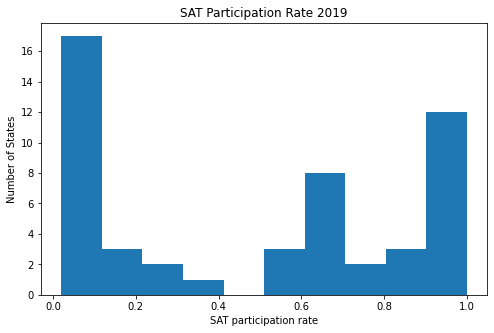

In [62]:
plt.figure(figsize=(8,5))
plt.hist(final_sat_act_2019[['sat_participation_percentage']]);
plt.title('SAT Participation Rate 2019')
plt.xlabel('SAT participation rate');
plt.ylabel('Number of States');

### Histogram for ACT Participation Rate in 2019

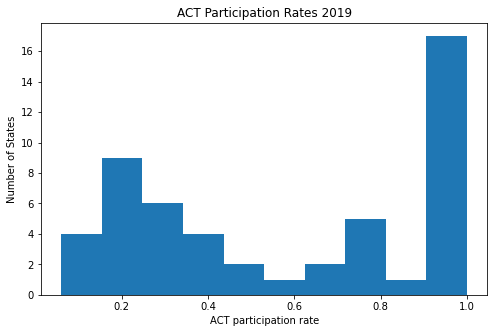

In [63]:
plt.figure(figsize=(8,5))
plt.hist(final_sat_act_2019[['act_participation_percentage']])
plt.title('ACT Participation Rates 2019')
plt.xlabel('ACT participation rate');
plt.ylabel('Number of States');

SAT has a large group of low-end participation rates (<10%), \
a cluster of states with participation in the 50-75% range, \
and then a group of states with 100% participation. \
Whereas  ACT has almost no states with lower than 10% participation, \
has a cluster of states in the 15-35% range, only a small number of states in the mid to high range, \
and then a large group of states with  100% participation. 

### Histogram for Mean ACT Score 2019

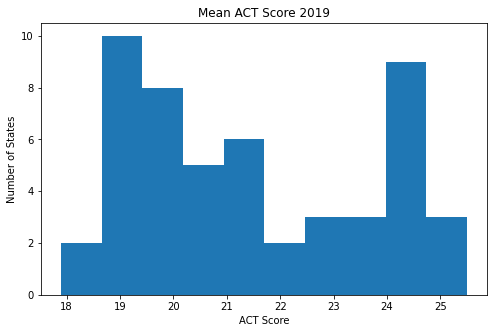

In [64]:
plt.figure(figsize=(8,5))
plt.hist(final_sat_act_2019[['act_composite_score']])
plt.title('Mean ACT Score 2019')
plt.xlabel('ACT Score');
plt.ylabel('Number of States');

### Histogram for Mean SAT Score 2019

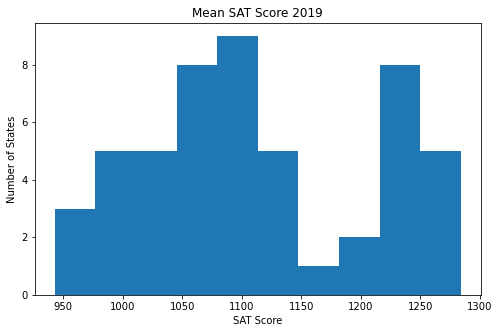

In [65]:
plt.figure(figsize=(8,5))
plt.hist(final_sat_act_2019[['sat_total_score']])
plt.title('Mean SAT Score 2019')
plt.xlabel('SAT Score');
plt.ylabel('Number of States');

In both tests there is a cluster of high-participation state scores and a cluster of low-participation state scores

### Boxplot for SAT Vs ACT participation rate in 2019

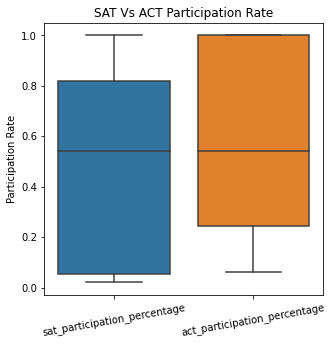

In [66]:
fig, ax  = plt.subplots(figsize=(5,5))
plt.title('SAT Vs ACT Participation Rate')
plt.ylabel('Participation Rate')
sns.boxplot(data=final_sat_act_2019[['sat_participation_percentage','act_participation_percentage']],width=0.8);
plt.xticks(rotation=10);

ACT participation rate is significantly higher than that of the SAT

### Scatter Plot for SAT Participation Vs Mean SAT Score 

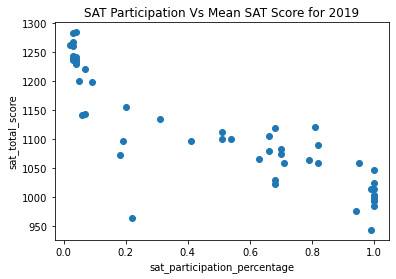

In [67]:
plt.scatter(x=final_sat_act_2019['sat_participation_percentage'],y=final_sat_act_2019['sat_total_score'])
plt.title('SAT Participation Vs Mean SAT Score for 2019')
plt.xlabel('sat_participation_percentage');
plt.ylabel('sat_total_score');

### Scatter Plot for ACT Participation Vs Mean ACT Score 

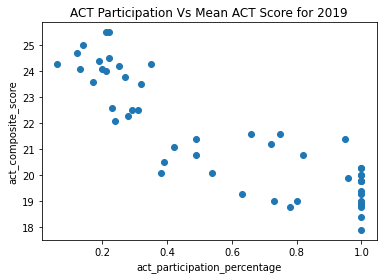

In [68]:
plt.scatter(x=final_sat_act_2019['act_participation_percentage'],y=final_sat_act_2019['act_composite_score'])
plt.title('ACT Participation Vs Mean ACT Score for 2019')
plt.xlabel('act_participation_percentage');
plt.ylabel('act_composite_score');

For both tests, lower rates of participation correspond with higher mean score by state. \
In the SAT plot, for instance,  cluster of ACT-dominated states at top left where SAT participation is very low \
and mean scores are all >1200. The small subset of high achieving students that bother to take both tests are high \
scorers, and so these states have artificially higher score averages. The downward slope of both graphs indicates \
the negative association between the variables.

### Heatmap for SAT and ACT 2019

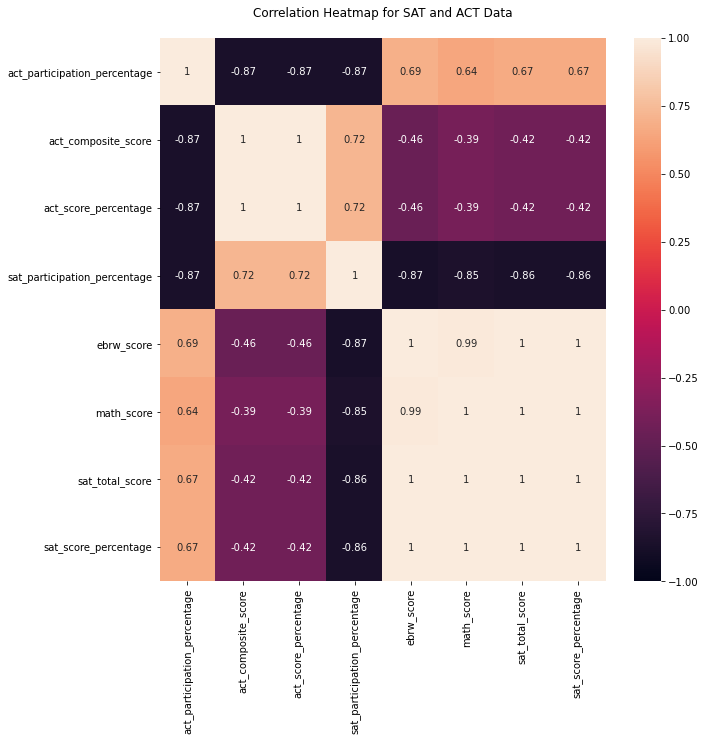

In [69]:
fig = plt.figure(figsize=(10,10))
ax = sns.heatmap(final_sat_act_2019.corr(),annot=True,vmin=-1,vmax=1)
ax.set_title('Correlation Heatmap for SAT and ACT Data\n');

participation rate and mean score are negatively correlated for both the tests.\
participation rate of SAT test is positively correlated with mean score of ACT test and viceversa \
mean score of SAT is negatively correlated with mean score of ACT and vice versa. 